<a href="https://colab.research.google.com/github/arshpreetw11/UCI-credit-card/blob/main/proj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd

In [72]:
df=pd.read_csv('/content/UCI_Credit_Card.csv')

In [73]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [74]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [75]:
#SEX,EDUCATION,MARRIAGE->ONE HOT ENCODE
#AGE->CONTINUOUS         default.payment.next.month-->1=fail 0->can do payment

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['ID','default.payment.next.month'],axis=1),df['default.payment.next.month'])

In [78]:
from sklearn.base import BaseEstimator,TransformerMixin
class FeatureEngineer(BaseEstimator,TransformerMixin):
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    X=X.copy()
    bill_cols=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
    pay_cols=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
    status_cols=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
    X['bill_mean']=X[bill_cols].mean(axis=1)
    X['pay_mean']=X[pay_cols].mean(axis=1)

    X['max_bill']=X[bill_cols].max(axis=1)
    X['min_bill']=X[bill_cols].min(axis=1)

    X['max_pay']=X[pay_cols].max(axis=1)
    X['min_pay']=X[pay_cols].min(axis=1)

    X['std_bill']=X[bill_cols].std(axis=1)
    X['std_pay']=X[pay_cols].std(axis=1)

    X['min_bill_pay_diff']=X['min_bill']-X['min_pay']
    X['max_bill_pay_diff']=X['max_bill']-X['max_pay']

    X['total_bill']=X[bill_cols].sum(axis=1)
    X['total_pay']=X[pay_cols].sum(axis=1)

    X['total_bill_pay_diff']=X['total_bill']-X['total_pay']

    X['payment_ratio']=X['total_pay']/(X['total_bill']+1)
    X['debt_ratio']=X['bill_mean']/(X['pay_mean']+1)

    X['num_delayed_months']=(X[status_cols]>0).sum(axis=1)
    X['max_delayed_month']=X[status_cols].max(axis=1)

    X['credit_utilization']=X['bill_mean']/(X['pay_mean']+1)
    X['high_utilization']=(X['credit_utilization']>.8).astype(int)
    X['chronic_delinquent']=(X['num_delayed_months']>2).astype(int)

    X['never_paid']=(X['num_delayed_months']==6).astype(int)
    return X



In [79]:
fe=FeatureEngineer()
X_train_tnf=fe.fit_transform(X_train)
X_test_tnf=fe.transform(X_test)

In [80]:
X_train_tnf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,total_pay,total_bill_pay_diff,payment_ratio,debt_ratio,num_delayed_months,max_delayed_month,credit_utilization,high_utilization,chronic_delinquent,never_paid
26558,50000.0,2,3,3,51,0,0,0,0,0,...,11171.0,269228.0,0.039840,25.087143,0,0,25.087143,1,0,0
12176,50000.0,1,3,1,53,2,2,2,2,2,...,9363.0,275517.0,0.032866,30.406660,6,2,30.406660,1,1,1
9871,130000.0,2,2,2,43,0,0,0,0,0,...,15000.0,271160.0,0.052418,19.069705,0,0,19.069705,1,0,0
15682,250000.0,1,2,2,28,-2,-2,-2,-2,-2,...,273247.0,13317.0,0.953525,1.048713,0,-2,1.048713,1,0,0
11885,220000.0,2,2,2,37,-1,-1,-1,-1,-1,...,20816.0,232.0,0.988931,1.010854,0,-1,1.010854,1,0,0


In [82]:
X_train_tnf.shape

(22500, 44)

In [83]:
numeric_cols=['LIMIT_BAL','bill_mean','AGE',
       'pay_mean','max_bill', 'min_bill', 'max_pay', 'min_pay', 'std_bill',
       'std_pay', 'min_bill_pay_diff', 'max_bill_pay_diff', 'total_bill',
       'total_pay', 'total_bill_pay_diff']

<Axes: ylabel='total_bill_pay_diff'>

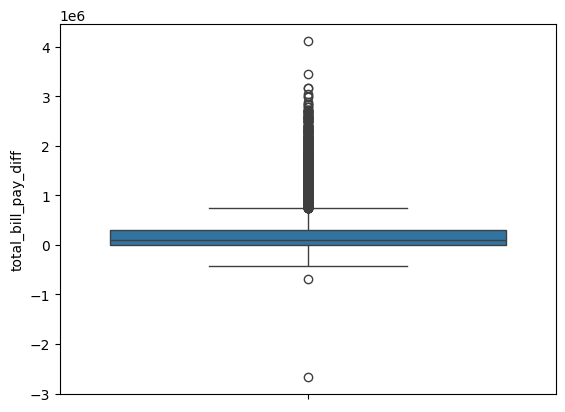

In [84]:
import seaborn as sns
sns.boxplot(X_train_tnf['total_bill_pay_diff'])

In [85]:
import matplotlib.pyplot as plt
import math

def plot_boxplots(df, numeric_cols):
    n_cols = 4  # plots per row
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.boxplot(df[col].dropna(), vert=True)
        plt.title(col)
        plt.ylabel("Value")

    plt.tight_layout()
    plt.show()

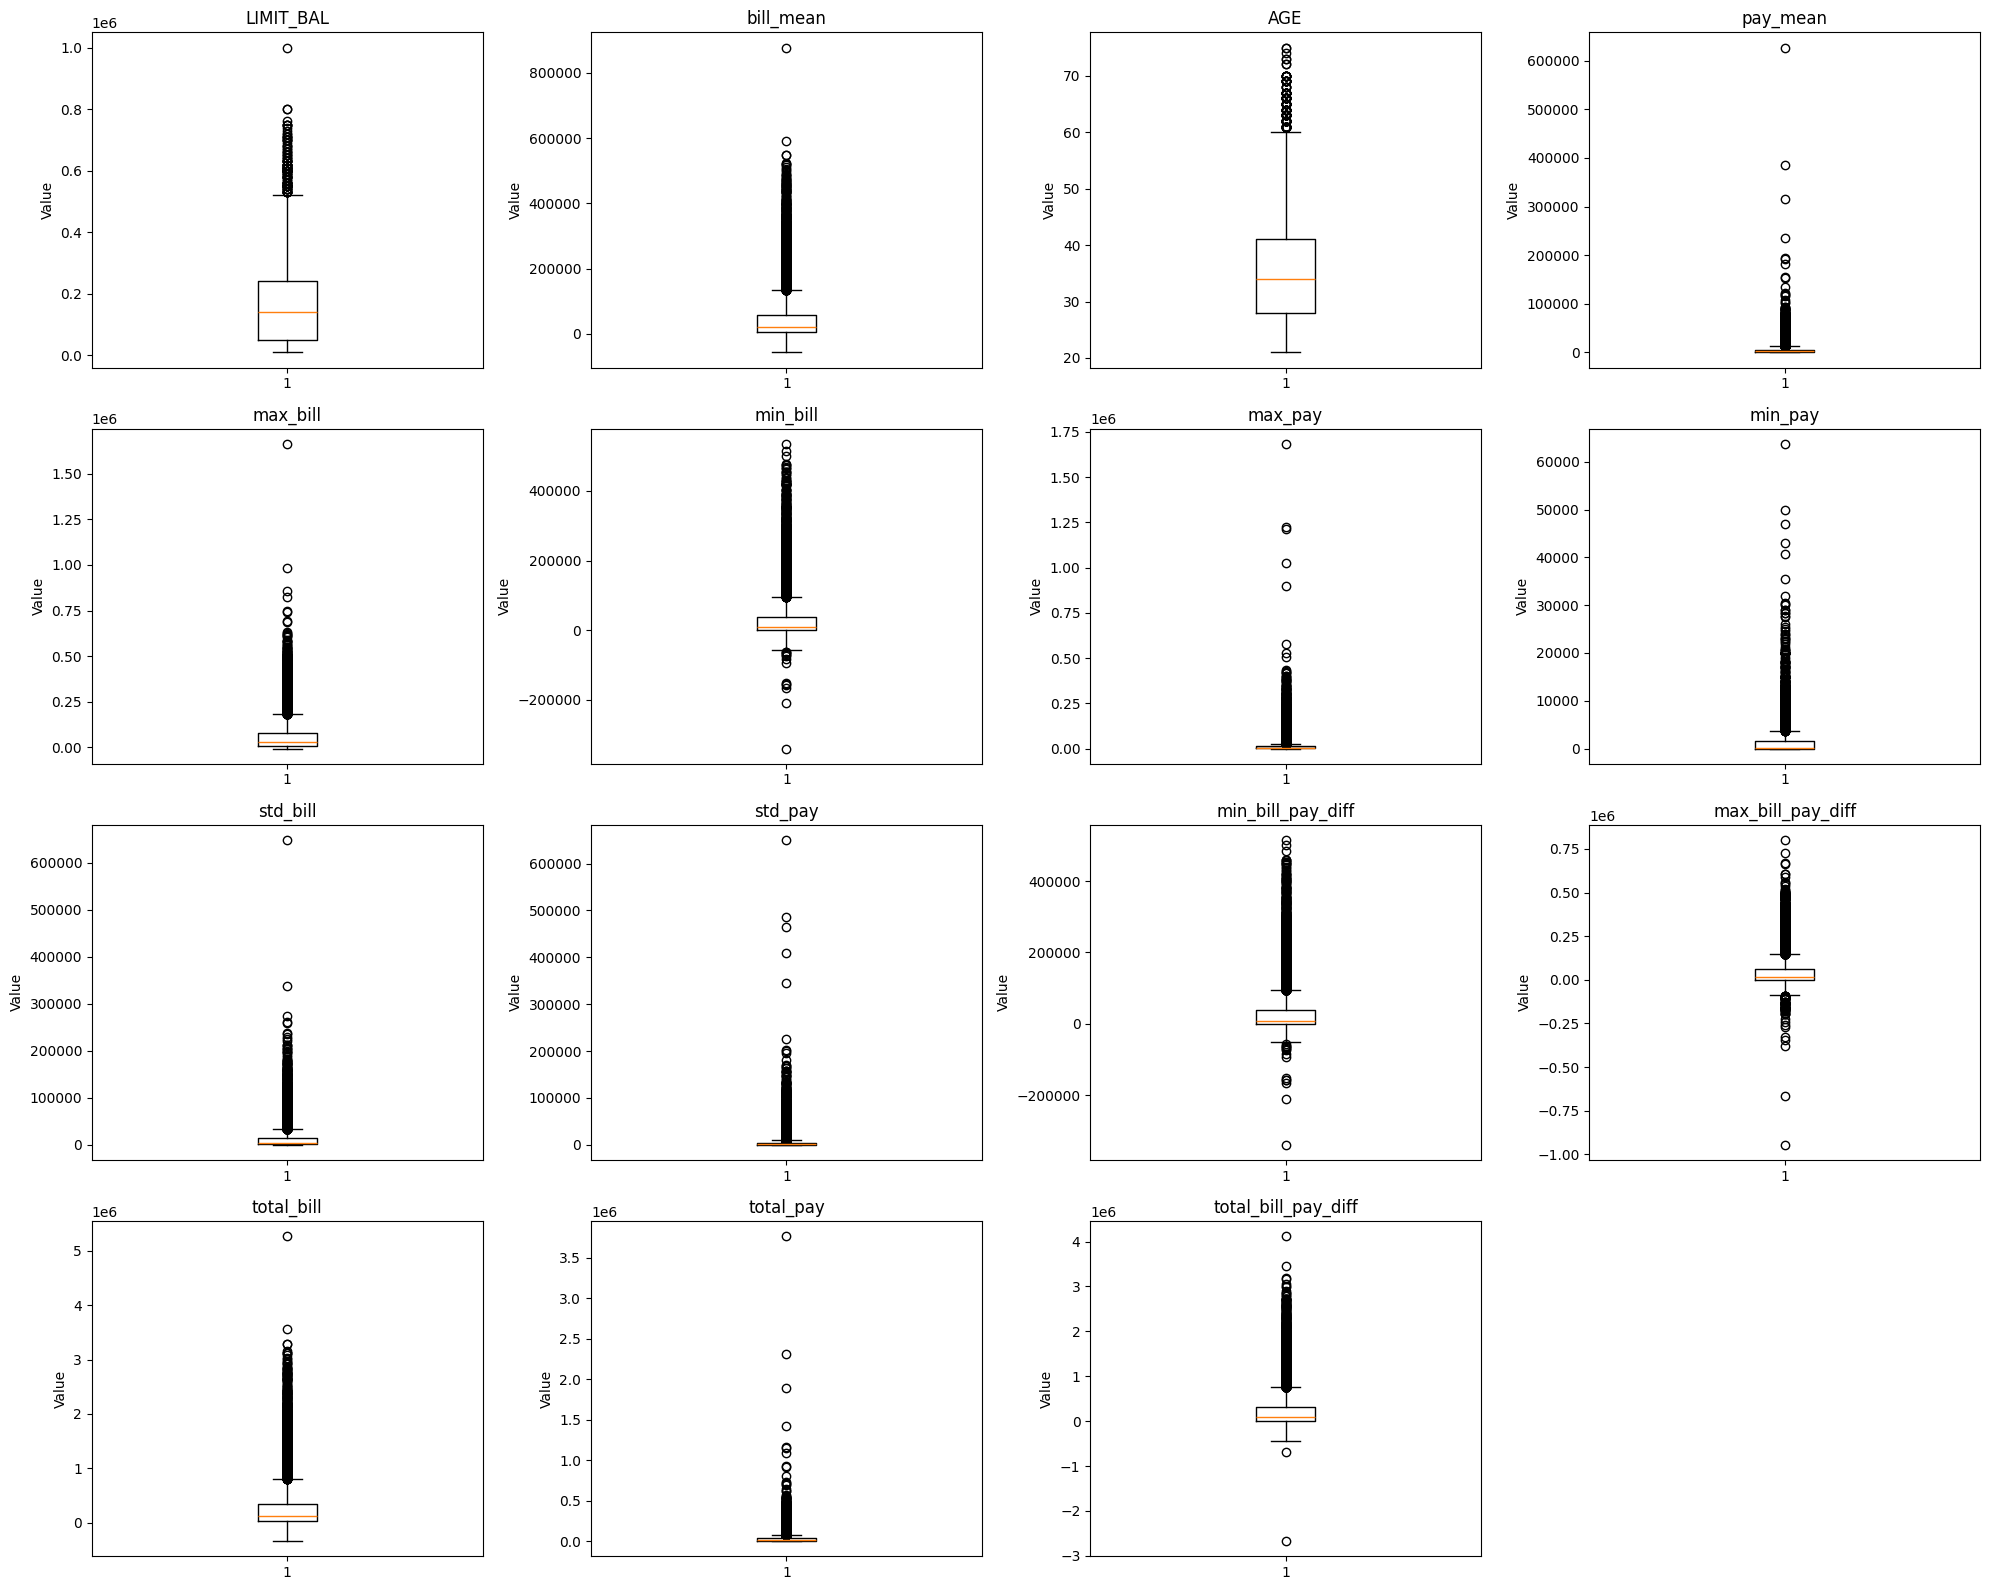

In [86]:
plot_boxplots(X_train_tnf,numeric_cols)

In [87]:
standard_cols=['AGE','credit_utilization','debt_ratio']
skewness_outliers_cols=['LIMIT_BAL','bill_mean',
       'pay_mean','max_bill', 'min_bill', 'max_pay', 'min_pay', 'std_bill',
       'std_pay', 'min_bill_pay_diff', 'max_bill_pay_diff', 'total_bill',
       'total_pay', 'total_bill_pay_diff']

outliers_cols=['payment_ratio']

ordinal_cols=[
    'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','num_delayed_months','max_delayed_month'
]

raw_bill_cols = [
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6'
]

raw_pay_cols = [
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6'
]
binary_flag_cols = [
    'high_utilization',
    'chronic_delinquent',
    'never_paid'
]
categorical_cols = [
    'SEX',
    'MARRIAGE',
    'EDUCATION'
]

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer
class OutlierWrapper(BaseEstimator, TransformerMixin):

    def __init__(self, cols, iqr_factor=1.5):
        self.cols = cols
        self.iqr_factor = iqr_factor

    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        self.bounds_ = {}

        for col in self.cols:
            q1 = X[col].quantile(0.25)
            q3 = X[col].quantile(0.75)
            iqr = q3 - q1

            lower = q1 - self.iqr_factor * iqr
            upper = q3 + self.iqr_factor * iqr

            self.bounds_[col] = (lower, upper)

        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()

        for col, (lower, upper) in self.bounds_.items():
            X[col] = X[col].clip(lower=lower, upper=upper)

        return X

class SkewnessWrapper(BaseEstimator, TransformerMixin):

    def __init__(self, cols, skew_threshold=1.5):
        self.cols = cols
        self.skew_threshold = skew_threshold

    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        self.transformers_ = {}

        for col in self.cols:
            skew_val = X[col].skew()

            if abs(skew_val) > self.skew_threshold:
                pt = PowerTransformer(method="yeo-johnson", standardize=False)
                pt.fit(X[[col]])
                self.transformers_[col] = pt
            else:
                self.transformers_[col] = None

        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()

        for col, transformer in self.transformers_.items():
            if transformer is not None:
                X[col] = transformer.transform(X[[col]]).ravel()

        return X

In [89]:
X_test_tnf.shape

(7500, 44)

In [90]:
from sklearn.preprocessing import RobustScaler

In [102]:
pipe_outlier_skew_scale=Pipeline([
    ('outlier_wrapper',OutlierWrapper(skewness_outliers_cols)),
    ('skewness_wrapper',SkewnessWrapper(skewness_outliers_cols)),
    ('scale_wrapper',StandardScaler())
])
pipe_ratio=Pipeline([('scaler',RobustScaler())])
pipe_standard=Pipeline([('scaler',StandardScaler())])
pipe_ordinal=Pipeline([('pass','passthrough')])
pipe_raw_bill=Pipeline([('pass','passthrough')])
pipe_raw_pay=Pipeline([('pass','passthrough')])
pipe_binary_flag=Pipeline([('pass','passthrough')])
pipe_categorical=Pipeline([('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [103]:
Clf=ColumnTransformer([
    ('outlier_skew_scale',pipe_outlier_skew_scale,skewness_outliers_cols),
    ('ratio',pipe_ratio,standard_cols),
    ('standard',pipe_standard,standard_cols),
    ('status',pipe_ordinal,ordinal_cols),
    ('raw_bill',pipe_raw_bill,raw_bill_cols),
    ('raw_pay',pipe_raw_pay,raw_pay_cols),
    ('binary',pipe_binary_flag,binary_flag_cols),
    ('categorical',pipe_categorical,categorical_cols)
],remainder='drop',verbose_feature_names_out=False)

In [104]:
X_train_tnf2=Clf.fit_transform(X_train_tnf)
X_test_tnf2=Clf.transform(X_test_tnf)

In [105]:
X_train_tnf2.shape

(22500, 56)

In [106]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.0 MB/s eta 0:00:00


In [107]:
import optuna
neg=(y_train==0).sum()
pos=(y_train==1).sum()
pos_weight=neg/pos
pos_weight

np.float64(3.5217041800643085)

In [108]:
import xgboost as xgb
import optuna
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline

In [111]:
def objective(trial):

    xgb_model = xgb.XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 150, 400),
        max_depth=trial.suggest_int("max_depth", 3, 10),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.2, log=True),
        subsample=trial.suggest_float("subsample", 0.6, 0.9),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 0.9),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        gamma=trial.suggest_float("gamma", 0, 5),
        scale_pos_weight=pos_weight,
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
        tree_method="hist"
    )

    model = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocess', Clf),
        ('model', xgb_model)
    ])

    score = cross_val_score(
        model,
        X_train,
        y_train,
        cv=2,
        scoring="recall",
        n_jobs=-1
    ).mean()

    return score

In [113]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=30)

[I 2025-12-18 08:35:58,332] A new study created in memory with name: no-name-248a52b5-80bb-4caa-8ab0-2d1af191fa8d
[I 2025-12-18 08:36:02,098] Trial 0 finished with value: 0.5146704180064309 and parameters: {'n_estimators': 391, 'max_depth': 6, 'learning_rate': 0.16514304759701848, 'subsample': 0.7504179170427518, 'colsample_bytree': 0.6001751178398245, 'min_child_weight': 10, 'gamma': 1.7783914772624558}. Best is trial 0 with value: 0.5146704180064309.
[I 2025-12-18 08:36:06,611] Trial 1 finished with value: 0.5665192926045016 and parameters: {'n_estimators': 254, 'max_depth': 10, 'learning_rate': 0.04069898261028582, 'subsample': 0.8094424541329941, 'colsample_bytree': 0.6660454696439835, 'min_child_weight': 5, 'gamma': 3.9332440847766703}. Best is trial 1 with value: 0.5665192926045016.
[I 2025-12-18 08:36:12,941] Trial 2 finished with value: 0.5586816720257235 and parameters: {'n_estimators': 291, 'max_depth': 7, 'learning_rate': 0.04795279301268277, 'subsample': 0.69516763767353, '

In [114]:
best_params=study.best_params

In [120]:
study.best_value

0.6368569131832797

In [123]:
from sklearn.metrics  import classification_report,confusion_matrix

In [132]:
final_xgb=xgb.XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    min_child_weight=best_params['min_child_weight'],
    gamma=best_params['gamma'],
    scale_pos_weight=pos_weight,
    objective="binary:logistic",
    eval_metric="logloss",random_state=42,n_jobs=-1,tree_method="hist"
)
final_pipeline=Pipeline([
    ('feature_engineering',FeatureEngineer()),
    ('preprocess',Clf),
    ('model',final_xgb)])
final_pipeline.fit(X_train,y_train)


Pipeline(steps=[('feature_engineering', FeatureEngineer()),
                ('preprocess',
                 ColumnTransformer(transformers=[('outlier_skew_scale',
                                                  Pipeline(steps=[('outlier_wrapper',
                                                                   OutlierWrapper(cols=['LIMIT_BAL',
                                                                                        'bill_mean',
                                                                                        'pay_mean',
                                                                                        'max_bill',
                                                                                        'min_bill',
                                                                                        'max_pay',
                                                                                        'min_pay',
                                                                                        'std_bill',
                                                                                        'std_pay',
                                                                                        'min_bill_pay_diff',
                                                                                        'max_bill_pay_diff',
                                                                                        'total_bill',
                                                                                        'total_pay',
                                                                                        'tota...
                               gamma=2.3551698023942027, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.036206397437499434, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=377, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [133]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report
y_prob = final_pipeline.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
min_precision = 0.40

valid_idxs = np.where(precisions[:-1] >= min_precision)[0]

best_idx = valid_idxs[np.argmax(recalls[valid_idxs])]
best_threshold = thresholds[best_idx]

best_threshold

np.float32(0.421446)

In [134]:

y_pred=(y_prob>best_threshold).astype(int)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      5840
           1       0.40      0.73      0.52      1660

    accuracy                           0.70      7500
   macro avg       0.65      0.71      0.65      7500
weighted avg       0.79      0.70      0.72      7500

[[4014 1826]
 [ 442 1218]]


In [142]:
import pandas as pd

def predict_default(
    LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE,
    PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6,
    BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
    PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6
):
    input_df = pd.DataFrame([{
        'LIMIT_BAL': LIMIT_BAL,
        'SEX': SEX,
        'EDUCATION': EDUCATION,
        'MARRIAGE': MARRIAGE,
        'AGE': AGE,
        'PAY_0': PAY_0,
        'PAY_2': PAY_2,
        'PAY_3': PAY_3,
        'PAY_4': PAY_4,
        'PAY_5': PAY_5,
        'PAY_6': PAY_6,
        'BILL_AMT1': BILL_AMT1,
        'BILL_AMT2': BILL_AMT2,
        'BILL_AMT3': BILL_AMT3,
        'BILL_AMT4': BILL_AMT4,
        'BILL_AMT5': BILL_AMT5,
        'BILL_AMT6': BILL_AMT6,
        'PAY_AMT1': PAY_AMT1,
        'PAY_AMT2': PAY_AMT2,
        'PAY_AMT3': PAY_AMT3,
        'PAY_AMT4': PAY_AMT4,
        'PAY_AMT5': PAY_AMT5,
        'PAY_AMT6': PAY_AMT6
    }])

    prob = final_pipeline.predict_proba(input_df)[0, 1]

    if prob < 0.25:
        risk = "LOW RISK"
    elif prob < 0.5:
        risk = "MODERATE RISK"
    elif prob < 0.75:
        risk = "HIGH RISK"
    else:
        risk = "EXTREME RISK"

    return {
        "Default Probability": round(float(prob), 4),
        "Risk Category": risk
    }

In [144]:
import gradio as gr

interface = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Number(label="Credit Limit"),
        gr.Radio([1, 2], label="Sex (1=Male, 2=Female)"),
        gr.Dropdown([1, 2, 3, 4], label="Education"),
        gr.Dropdown([1, 2, 3], label="Marriage"),
        gr.Number(label="Age"),

        gr.Number(label="PAY_0"),
        gr.Number(label="PAY_2"),
        gr.Number(label="PAY_3"),
        gr.Number(label="PAY_4"),
        gr.Number(label="PAY_5"),
        gr.Number(label="PAY_6"),

        gr.Number(label="Bill Amount 1"),
        gr.Number(label="Bill Amount 2"),
        gr.Number(label="Bill Amount 3"),
        gr.Number(label="Bill Amount 4"),
        gr.Number(label="Bill Amount 5"),
        gr.Number(label="Bill Amount 6"),

        gr.Number(label="Payment Amount 1"),
        gr.Number(label="Payment Amount 2"),
        gr.Number(label="Payment Amount 3"),
        gr.Number(label="Payment Amount 4"),
        gr.Number(label="Payment Amount 5"),
        gr.Number(label="Payment Amount 6")




    ],
    outputs=gr.JSON(label="Prediction"),
    title="Credit Card Default Risk Predictor",
    description="Predicts probability of default next month based on credit behavior"
)

In [145]:
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1bbf5d7dc187ded58c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
